In [ ]:
from Supportingcode.Data_reader import Data
from Supportingcode.Algorithms import rescheduling_problem
from Supportingcode.Classes import Train
import igraph

In [ ]:
local = 'Data/NewExample/'
info = Data('Example', local, "edb")
tracks, stations, trains, current_time, maxtime = info.read_from_CSV()
logfilespath = local+'LogFiles/'

In [ ]:
tracks.pop(5)
tracks.pop(6)
tracks.pop(7)
tracks.pop(8)
tracks.pop(9)
tracks.pop(10)
tracks[1].next = [2,3]
tracks[2].next = [4]
tracks[3].next = [4]
tracks[4].next = []
tracks

{1: track:1 conections: [2, 3],
 2: track:2 conections: [4],
 3: track:3 conections: [4],
 4: track:4 conections: []}

In [ ]:
stations['s1'].tracks = [1]
stations['s3'].tracks = [4]
stations

{'s1': Station: s1 tracks: [1], 's3': Station: s3 tracks: [4]}

In [ ]:
trains.pop(4)
trains

{1: train1 {1: 2, 2: 2, 3: 3, 4: 3, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 0: 6},
 2: train2 {1: 2, 2: 2, 3: 2, 4: 2, 5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 0: 1},
 3: train3 {1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 0: 14}}

In [ ]:
trains[1].current_route = [0,1,2,4,max(tracks)+1]
trains[2].current_route = [0,1,3,4,max(tracks)+1]
trains[3].current_route = [0,1,2,4,max(tracks)+1]
trains[1].current_route

[0, 1, 2, 4, 5]

In [ ]:
trains[1].begin_schedule = {1:0,2:5,4:9}
trains[2].begin_schedule = {1:6,3:11,4:15}
trains[3].begin_schedule = {1:12,2:17,4:21}
trains[1].begin_schedule

{1: 0, 2: 5, 4: 9}

In [ ]:
trains[1].end_schedule = {1:6,2:10,4:15}
trains[2].end_schedule = {1:12,3:16,4:21}
trains[3].end_schedule = {1:18,2:22,4:27}
trains[1].end_schedule

{1: 6, 2: 10, 4: 15}

Inserting perturbation in to time on track:
train 1 after time 7 gets 14 seconds delayed in track 2

In [ ]:
trains[1].timeontrack = {1:5,2:18,3:4,4:5}
trains[2].timeontrack = {1:5,2:4,3:4,4:5}
trains[3].timeontrack = {1:5,2:4,3:4,4:5}
trains[1].timeontrack

{1: 5, 2: 18, 3: 4, 4: 5}

In [ ]:
Train.define_dummhnode_timeontrack(trains)
for t in trains.values():
    t.defining_stations(stations)
    t.defineST(True, 1)
    for s in t.stations.values():
        t.planned_stop[s] = 0

In [ ]:
current_time

7

In [ ]:
# info.write_to_CSV()

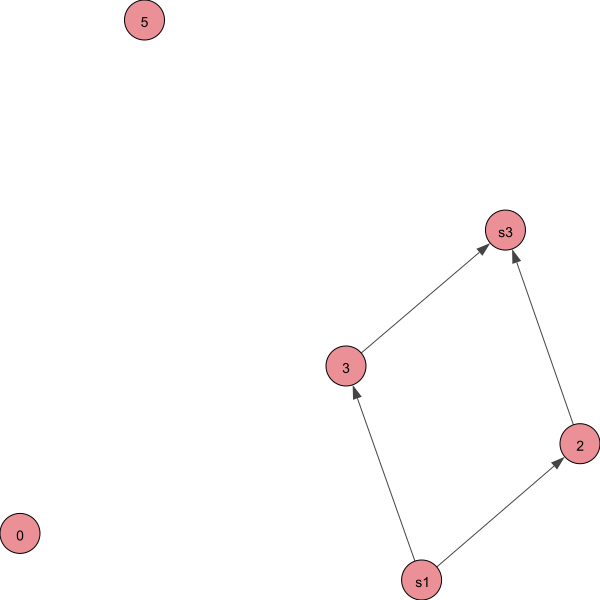

In [ ]:
rescheduling = rescheduling_problem(tracks, stations, trains, current_time, maxtime, 'Example')
rescheduling.plot_graph(True,local)

Creating the data of the problem after the perturbation 

In this problem train 1 is delayed 1 second in track 1 creating the time table with a conflict

However the problem begins in time 7 so the data used is only after the current time

In [ ]:
rescheduling.Current_time_adjust()

# Original timetable

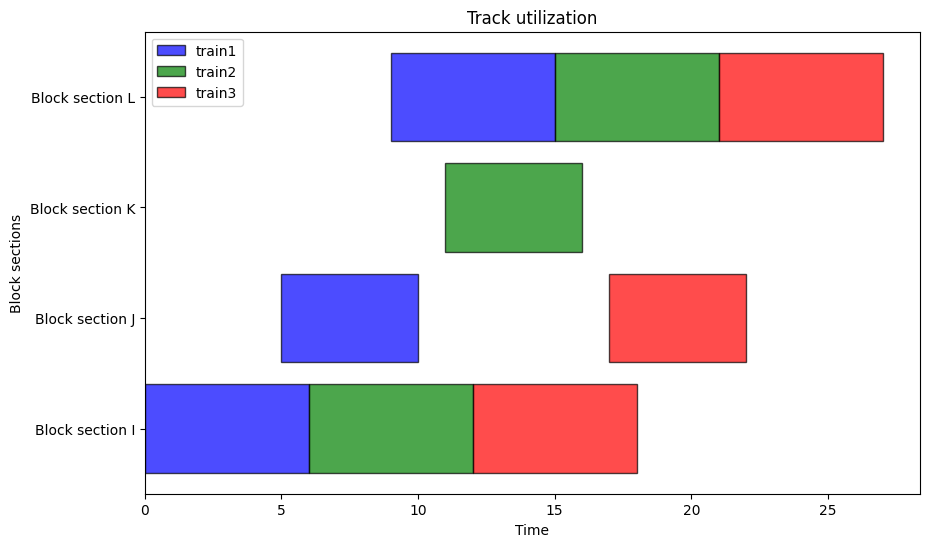

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3'
# }

Jobs = {f"train{train1}" : {tracka: (trains[train1].begin_schedule[tracka], trains[train1].end_schedule[tracka]) for tracka in trains[train1].begin_schedule} for train1 in trains}

# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(tracks.keys())
ax.set_yticks(resources)
blocksections = ["I","J","K","L"]
ax.set_yticklabels([f'Block section {block}' for block in blocksections])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Track utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()


# Disturbed time table

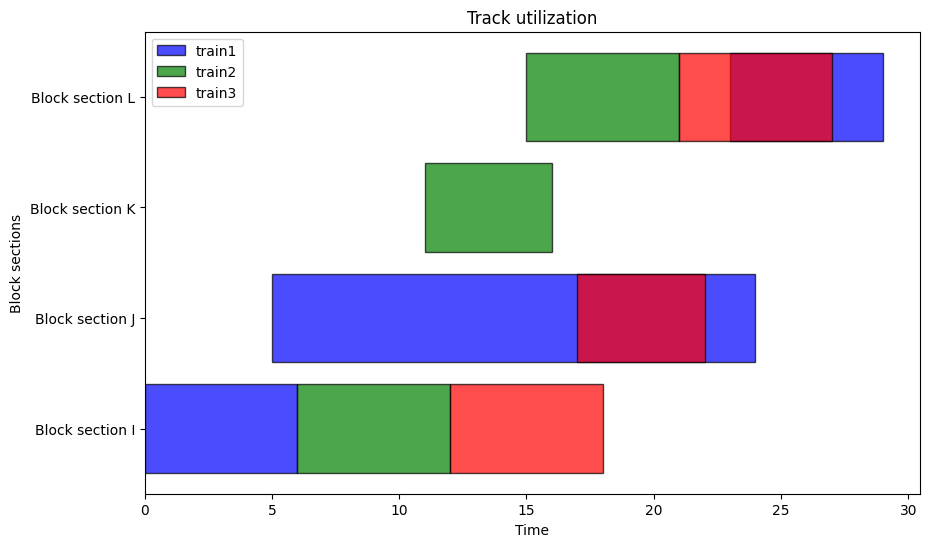

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
Jobs = {
    'train1': {1:(0,6),2:(5,24),4:(23,29)},
    'train2': {1:(6,12),3:(11,16),4:(15,21)},
    'train3': {1:(12,18),2:(17,22),4:(21,27)}
    }

trains[1].begin_schedule = {1:0,2:5,4:9}
trains[2].begin_schedule = {1:6,3:11,4:15}
trains[3].begin_schedule = {1:12,2:17,4:21}
trains[1].end_schedule = {1:6,2:10,4:15}
trains[2].end_schedule = {1:12,3:16,4:21}
trains[3].end_schedule = {1:18,2:22,4:27}

# Jobs = {f"train{train1}" : {tracka: (trains[train1].begin_schedule[tracka], trains[train1].end_schedule[tracka]) for tracka in trains[train1].begin_schedule} for train1 in trains}

# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(tracks.keys())
ax.set_yticks(resources)
blocksections = ["I","J","K","L"]
ax.set_yticklabels([f'Block section {block}' for block in blocksections])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Track utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()


# Model 1

In [ ]:
Fixedroute_reschedule1 = rescheduling.Model1(True, logfilespath)
Newtimetable1 = Fixedroute_reschedule1.times.extract_values()

Set parameter LogFile to value "Data/NewExample/LogFiles/Model1/Example.log"
Solver log file: Data/NewExample/LogFiles/Model1/Example.log
Set parameter TimeLimit to value 90
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11+.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 21 rows, 19 columns and 37 nonzeros
Model fingerprint: 0x67ee6560


Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [5e+00, 6e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 21 rows and 19 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.2000000e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  4.200000000e+01
Set parameter LogFile to value ""


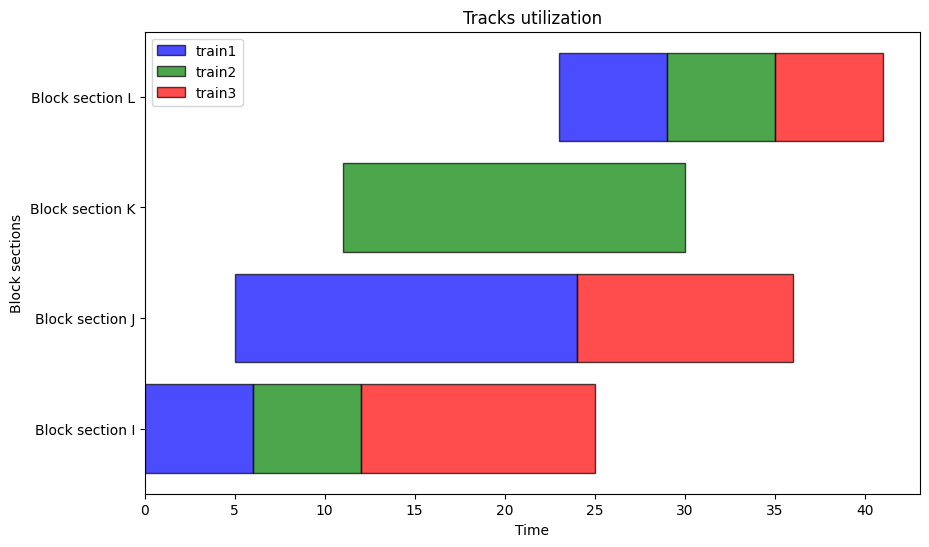

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
route = {}
schedulestart = {}
for k in Newtimetable1:
    if k[1] ==0:
        route[k[0]] =[0]
    else:
        route[k[0]].append(k[1])
        
# Jobs={f'train{k}': {route[k][i]: (Newtimetable1[k,route[k][i]],Newtimetable1[k,route[k][i+1]]) for i in range(1,len(route[k])-1)} for k in route}
for k in route:
    # print(route[k][len(route[k])-1], len(route[k])-1, route[k])
    # Jobs[f'train{k}'][route[k][1]] = (Newtimetable1[k,route[k][1]],Newtimetable1[k,route[k][2]]+1)
    for i in range(1,len(route[k])-2):
        Jobs[f'train{k}'][route[k][i]] = Newtimetable1[k,route[k][i]],Newtimetable1[k,route[k][i+1]]+1
    # print(Jobs[f'train{k}'])
    Jobs[f'train{k}'][route[k][len(route[k])-2]] = (Newtimetable1[k,route[k][len(route[k])-2]],Newtimetable1[k,route[k][len(route[k])-1]]+1)
# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(tracks.keys())
ax.set_yticks(resources)
blocksections = ["I","J","K","L"]
ax.set_yticklabels([f'Block section {block}' for block in blocksections])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()

In [ ]:
    # 'train1': {1:(0,6),2:(5,10),4:(9,15)},
    # 'train2': {1:(6,12),3:(11,17),4:(16,22)},
    # 'train3': {1:(13,19),2:(18,23),4:(22,28)}

# Model 2

In [ ]:
Fixedroute_reschedule2 = rescheduling.Model2(True, logfilespath)
Newtimetable2 = Fixedroute_reschedule2.times.extract_values()

Set parameter LogFile to value "Data/NewExample/LogFiles/Model3/Example.log"
Solver log file: Data/NewExample/LogFiles/Model3/Example.log
Set parameter TimeLimit to value 600
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11+.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 26 rows, 24 columns and 55 nonzeros
Model fingerprint: 0x3ae5bea9
Variable types: 19 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 6e+00]
  RHS range        [1e+00, 7e+01]
Presolve removed 21 rows and 19 columns
Presolve time: 0.00s
Presolved: 5 rows, 5 columns, 14 nonzeros
Variable types: 3 continuous, 2 integer (2 binary)
Found heuristic solution: objective 42.0000000
Found heuristic solution: objective 22.0000000

Explored 0 nodes (0 simplex 

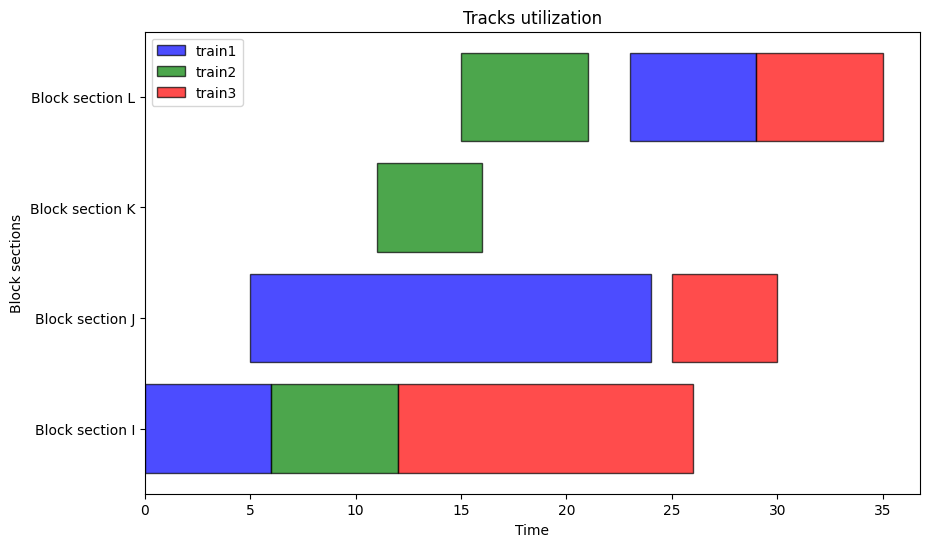

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
route = {}
schedulestart = {}
for k in Newtimetable2:
    if k[1] ==0:
        route[k[0]] =[0]
    else:
        route[k[0]].append(k[1])
        
# Jobs={f'train{k}': {route[k][i]: (Newtimetable2[k,route[k][i]],Newtimetable2[k,route[k][i+1]]) for i in range(1,len(route[k])-1)} for k in route}
for k in route:
    for i in range(1,len(route[k])-2):
        Jobs[f'train{k}'][route[k][i]] = Newtimetable2[k,route[k][i]],Newtimetable2[k,route[k][i+1]]+1
    Jobs[f'train{k}'][route[k][len(route[k])-2]] = (Newtimetable2[k,route[k][len(route[k])-2]],Newtimetable2[k,route[k][len(route[k])-1]]+1)
# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Set y-axis ticks and labels
resources = list(tracks.keys())
ax.set_yticks(resources)
blocksections = ["I","J","K","L"]
ax.set_yticklabels([f'Block section {block}' for block in blocksections])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()

# Model 3

In [ ]:
AlternativeRoutes_reschedule = rescheduling.Model3(True, 3, logfilespath)
Newtimetable3 = AlternativeRoutes_reschedule.times.extract_values()
Newroutes = AlternativeRoutes_reschedule.r.extract_values()

Set parameter LogFile to value "Data/NewExample/LogFiles/Model3/Example3.log"
Solver log file: Data/NewExample/LogFiles/Model3/Example3.log
Set parameter TimeLimit to value 600
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11+.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 59 rows, 50 columns and 232 nonzeros


Model fingerprint: 0xab4382c9
Variable types: 29 continuous, 21 integer (21 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 5e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 7 rows and 11 columns
Presolve time: 0.00s
Presolved: 52 rows, 39 columns, 202 nonzeros
Variable types: 21 continuous, 18 integer (18 binary)
Found heuristic solution: objective 54.0000000

Root relaxation: objective 1.400000e+01, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   14.00000    0    1   54.00000   14.00000  74.1%     -    0s
H    0     0                      18.0000000   14.00000  22.2%     -    0s

Explored 1 nodes (15 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 18 54 

Optimal 

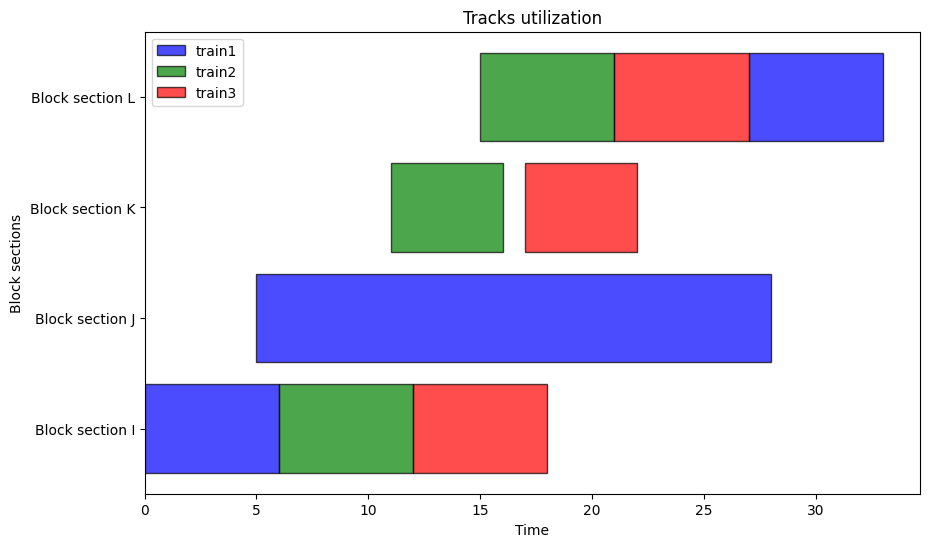

In [ ]:
import matplotlib.pyplot as plt

# Data
# Jobs = {
#     'train1': {1: (6, 10), 5: (9, 11), 7: (10, 14)},
#     'train2': {1: (1, 4), 5: (3, 5), 7: (4, 7)},
#     'train3': {1: (14, 17), 5: (16, 18), 7: (17, 21)},
#     'train4': {1: (10, 13), 5: (12, 14), 7: (13, 17)}
# }
timetable = {}
schedulestart = {}
for k in Newtimetable3:
    if Newroutes[k[:2]]>0:
        if k[2] ==0:
            timetable[k[0]] ={k[2]:Newtimetable3[k]}
        else:
            timetable[k[0]][k[2]] = Newtimetable3[k]

# Jobs={f'train{k}': {timetable[k][i]: (Newtimetable[k,timetable[k][i]],Newtimetable[k,timetable[k][i+1]]) for i in range(1,len(timetable[k])-1)} for k in timetable}
for k in timetable:
    route = list(timetable[k].keys())[1:]
    if route[:-1] == list(Jobs[f'train{k}'].keys()) or route[:-1] == list(Jobs[f'train{k}'].keys())[1:]:
        for i in range(len(route)-1):
            Jobs[f'train{k}'][route[i]] = (timetable[k][route[i]],timetable[k][route[i+1]]+1)
    else:
        Jobs[f'train{k}'] = {route[i]:(timetable[k][route[i]],timetable[k][route[i+1]]+1) for i in range(len(route)-1)}
    # Jobs[f'train{k}'][timetable[k][i]] = Newtimetable1[k,timetable[k][i]],Newtimetable1[k,timetable[k][i+1]]+1
        # Jobs[f'train{k}'] = {route[k][i]: (Newtimetable[k,route[k][i]],Newtimetable[k,route[k][i+1]]) for i in range(1,len(route[k])-1)}
# print(Jobs)
# print(Jobs)
# Plotting Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size


# Set y-axis ticks and labels
# resources = list(Jobs['train1'].keys())
resources = list(set([key for i in Jobs for key in Jobs[i].keys()]))
ax.set_yticks(resources)
blocksections = ["I","J","K","L"]
ax.set_yticklabels([f'Block section {block}' for block in blocksections])

# Plot each job with transparent colors
colors = ['b', 'g', 'r', 'c']  # You can customize colors as needed
bar_width = 0.4  # Adjust the bar width
handles = []  # To store legend handles
labels = []  # To store legend labels

for i, (job, resource_times) in enumerate(Jobs.items()):
    for resource, (start, end) in resource_times.items():
        bar = ax.barh(resource, end - start, left=start, color=colors[i], align='center',
                      edgecolor='black', alpha=0.7)  # Use alpha for transparency
    handles.append(bar[0])  # Append the handle for the legend
    labels.append(job)  # Append the label for the legend

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Block sections')
ax.set_title('Tracks utilization')

# Display legend only once
ax.legend(handles, labels)

# Show the Gantt chart
plt.show()